# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [69]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import os
import sys
PATH = '/content/drive/MyDrive/ML_Projects/Customer_Segmentation/'
data_name='customers.xlsx'
data_path=os.path.join(PATH,data_name)
sys.path.append(PATH)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs
%matplotlib inline

In [72]:
data = pd.read_excel(data_path)

In [73]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [75]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In general the mean for each feature seems much higher than the median(50%-Quartile), so this data seems somewhat skewed. We can visualize them as well in the histogram comming in next blocks.



<ipython-input-76-7fd45372e149>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],kde=True,bins=50)
<ipython-input-76-7fd45372e149>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],kde=True,bins=50)
<ipython-input-76-7fd45372e149>:4: UserWarning: 

`distplot` is a deprecated f

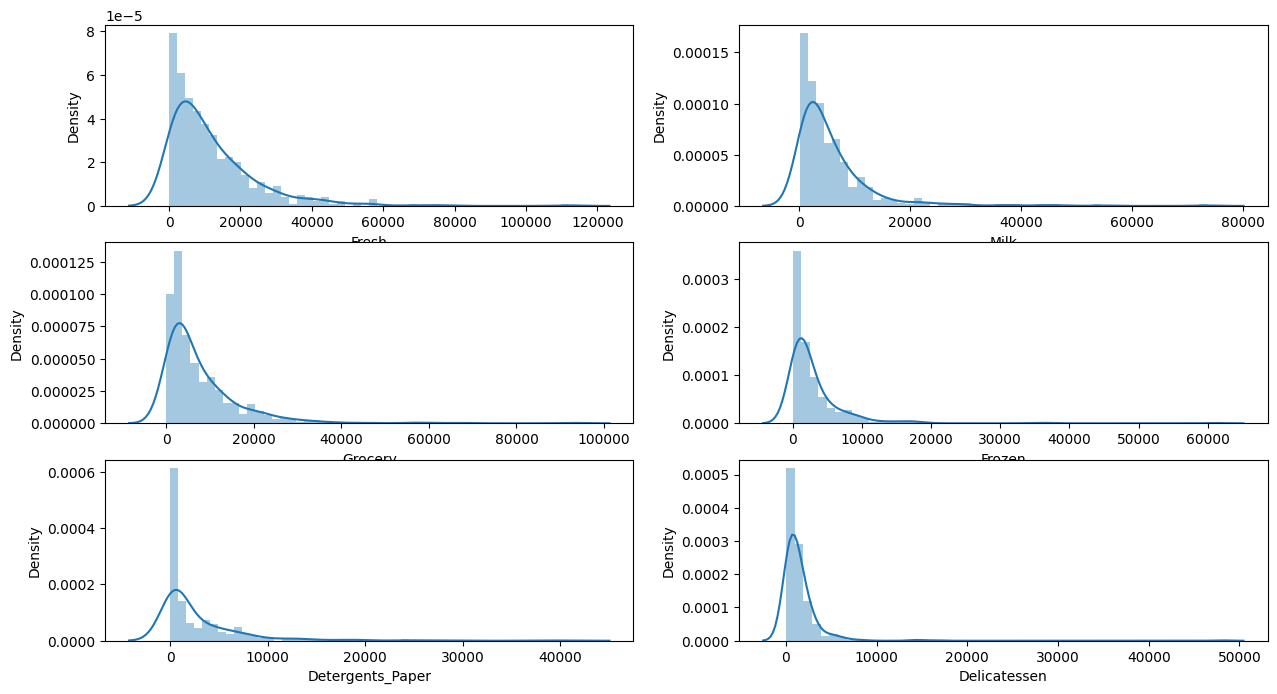

In [76]:

fig , ax = plt.subplots(3,2,figsize=(15,8))
for i,col in enumerate(data.columns[2:]):
  plt.subplot(3,2,i+1)
  sns.distplot(data[col],kde=True,bins=50)


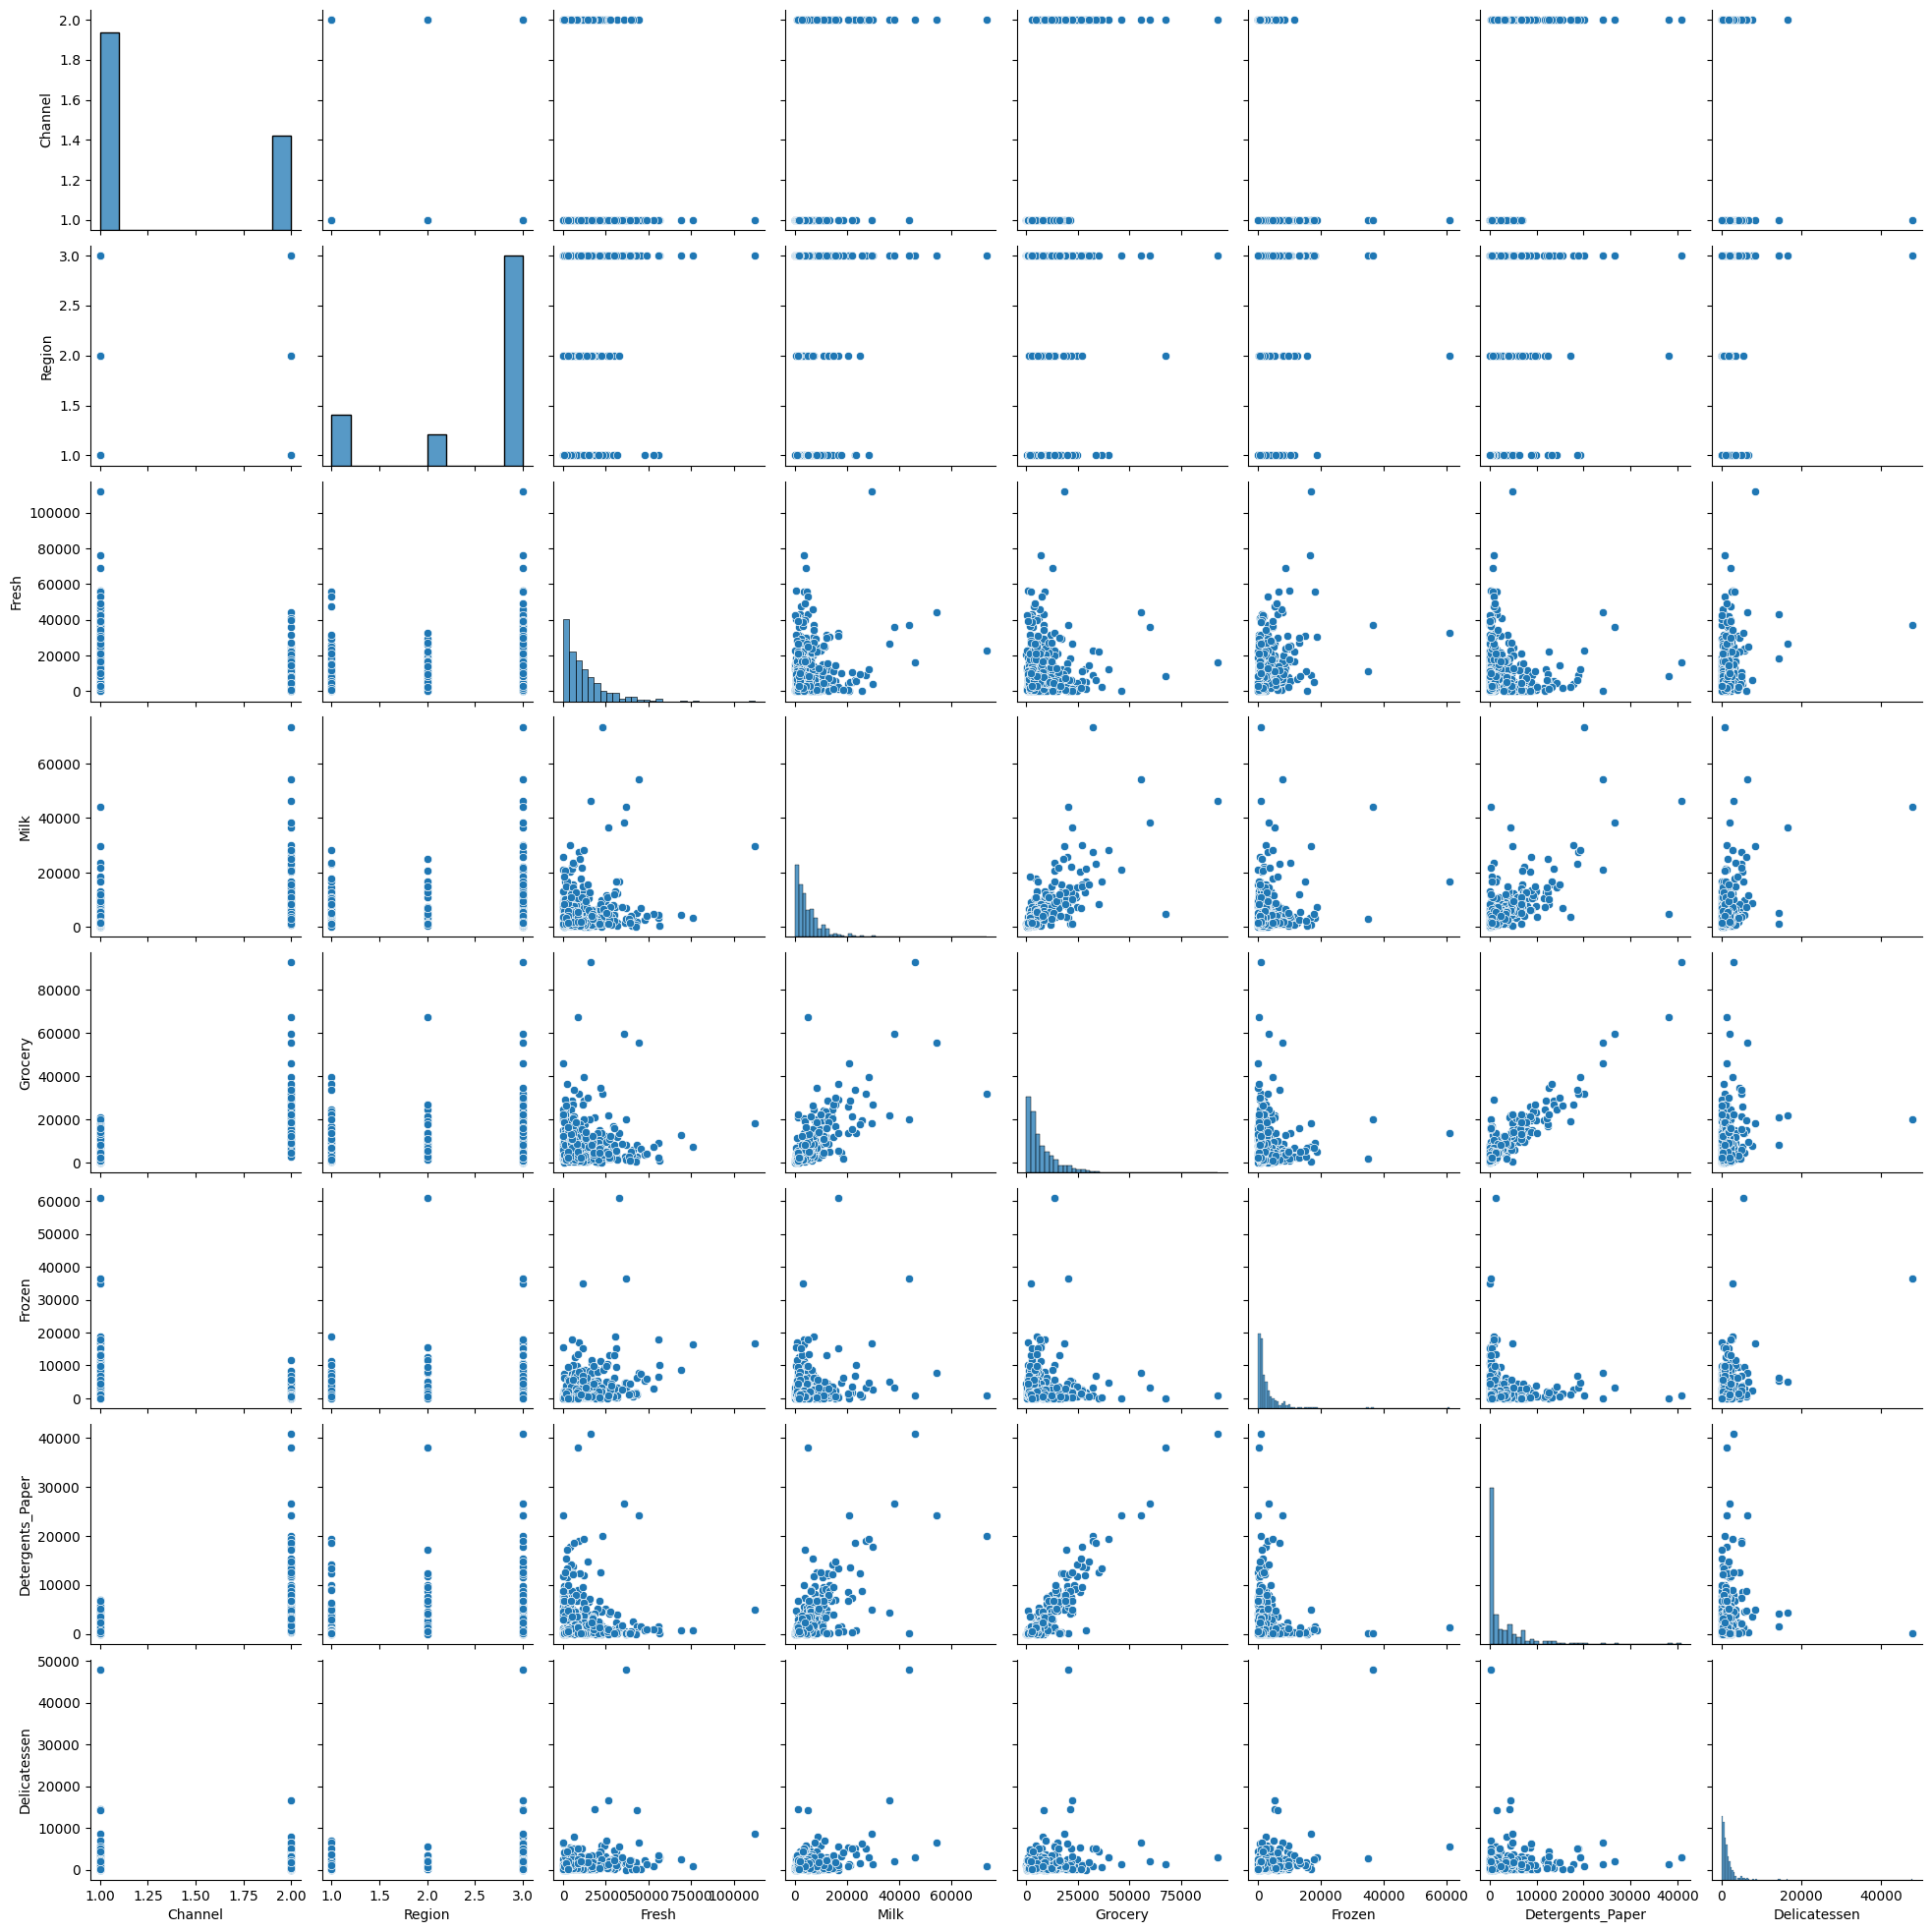

In [77]:
sns.pairplot(data)

In [78]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


##there is a relation between milk , grocery and Paper

what is the most demand features?

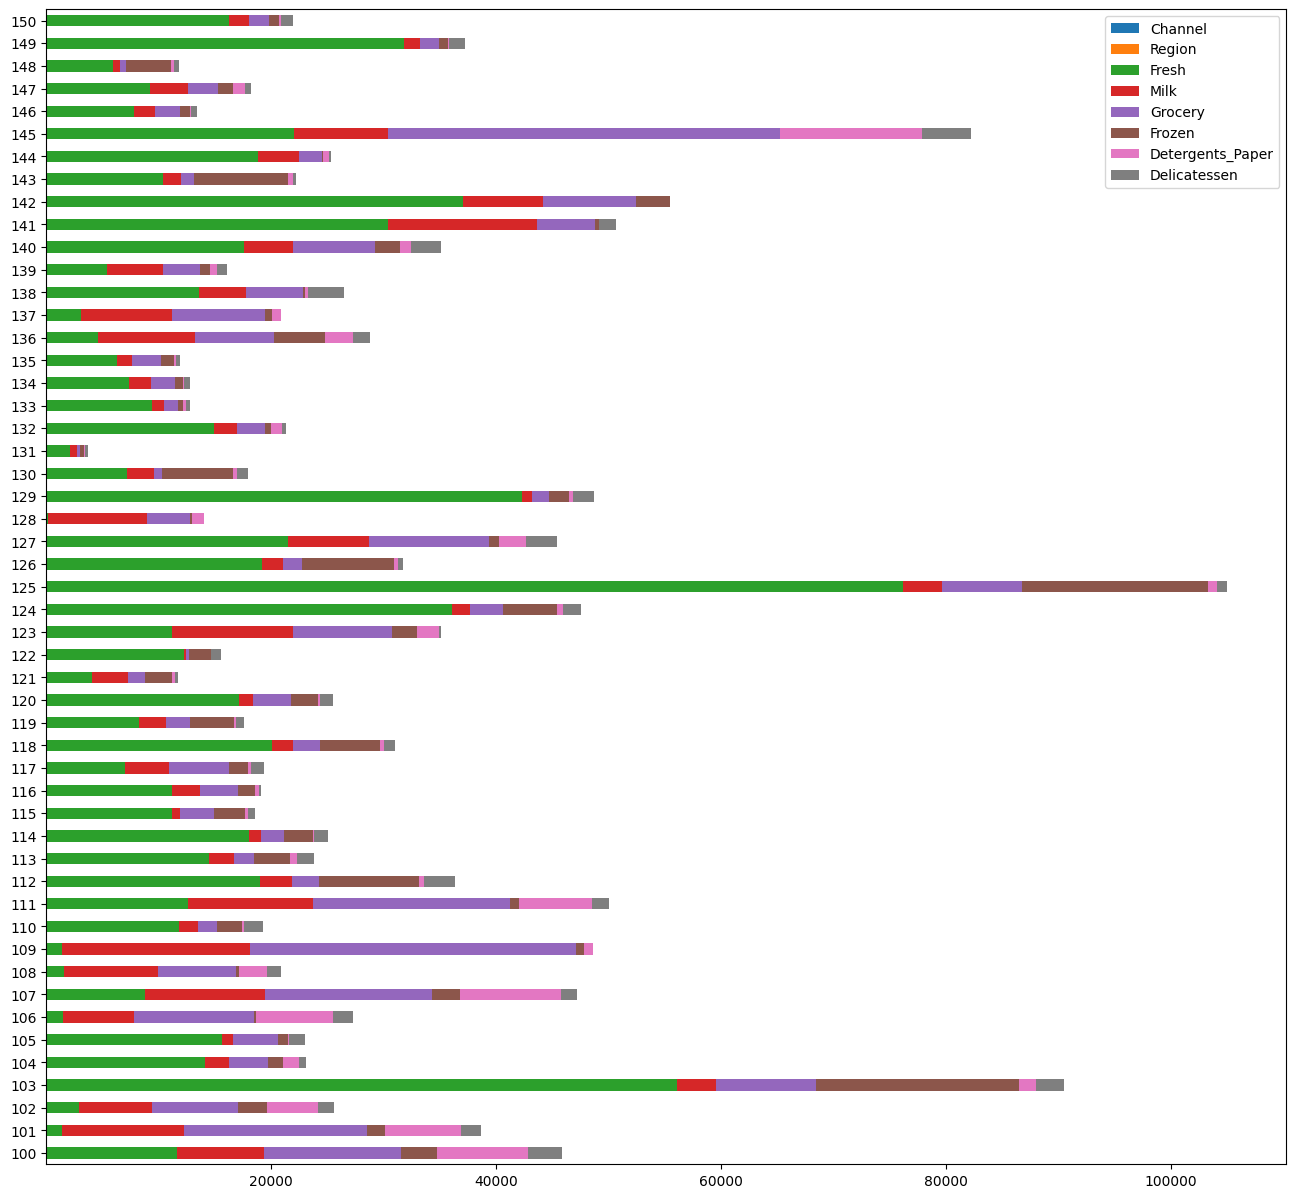

In [79]:
test_data = data.loc[100:150]
test_data.plot.barh(stacked=True,figsize=(16, 15) );


<ipython-input-80-8d7d17d010fe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[item]<=5000][item],color=color,kde=True,bins=50)
<ipython-input-80-8d7d17d010fe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[item]<=5000][item],color=color,kde=True,bins=50)
<ipython-input-8

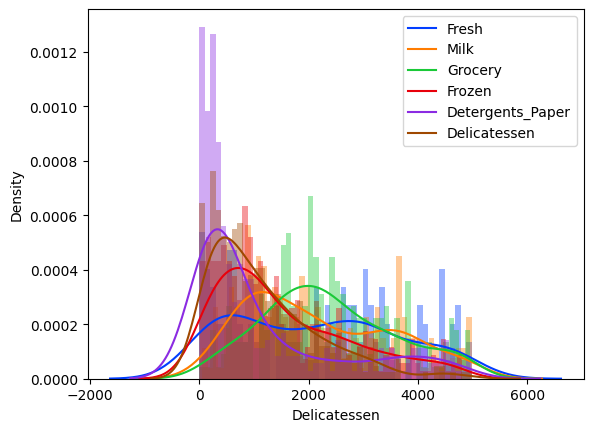

In [80]:
colors = sns.color_palette("bright", 6)

for color , item in zip(colors,data.columns[2:]):
  sns.distplot(data[data[item]<=5000][item],color=color,kde=True,bins=50)
  plt.legend([i for i in data.columns[2:]])


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

<Axes: >

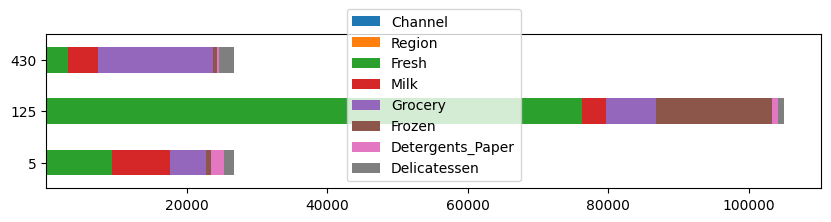

In [81]:
index=[5 , 125 ,430]
samples=data.iloc[index]
from numpy.ma.extras import stack
samples.plot.barh(stacked=True,figsize=(10,2))

##Quartile Visualization of sample


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
5,54.3,80.0,53.0,23.9,63.2,67.3
125,99.8,47.7,63.4,98.2,48.6,48.6
430,24.8,56.0,88.0,20.7,23.2,79.1


<Axes: >

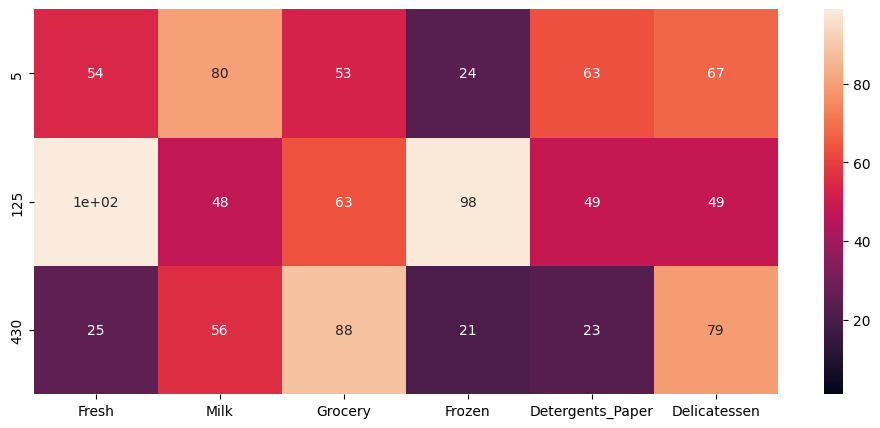

In [82]:
plt.figure(figsize = (12,5))
index=[5 , 125 ,430]
perc= data.rank(pct=True)
perc = 100*perc.round(3)
perc=perc.iloc[index,2:]
display(perc)
sns.heatmap(perc,annot=True,vmin=1, vmax=99)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be?


Answer:

Sample-1: This customer a heavy consumer of milk and Delicatessen. Frozen is pretty much less and below 25th quartile and mean. It should be Supermarket, because all kinds of produces are sold much more than average value except the frozen.


Sample-2: This customer is crazy at Fresh. It touched 100th quartile.Second most purchased items are frozens. Grocery is little below the mean value but pretty above the 50th quartile value. Rest of them are below 5oth quartile.This should be Greengrocery, be cause the main produce being sold is fresh produce and frozen while the total amount of produces is below average.


Sample-3: For this customer, first priority is Grocery which is above 75th quartile range and pretty above mean. Next priority os Delicatessen which is above 50th quartile range and also above the mean. Milk is below mean and median. Rest of the other are blow mean and 25th quartile range. It is Convenience store, because the main produce being sold is grocery, while the total amount of produces is below average






### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
targets = data.columns[2:].values

scores={}
for target in targets:
  feature = data.drop(target,axis=1)
  label=data[target]

  X_train , X_test , y_train , y_test = train_test_split(feature,label,test_size=0.25,random_state=42)

  model = DecisionTreeRegressor()
  model.fit(X_train,y_train)

  score = model.score(X_test, y_test)


  scores[target]=score

new_one = pd.DataFrame(scores,index=['Score'])

display(new_one)





,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Score,-0.362688,0.23539,0.596543,-0.207425,0.54147,-1.974139


<Figure size 1200x1200 with 0 Axes>

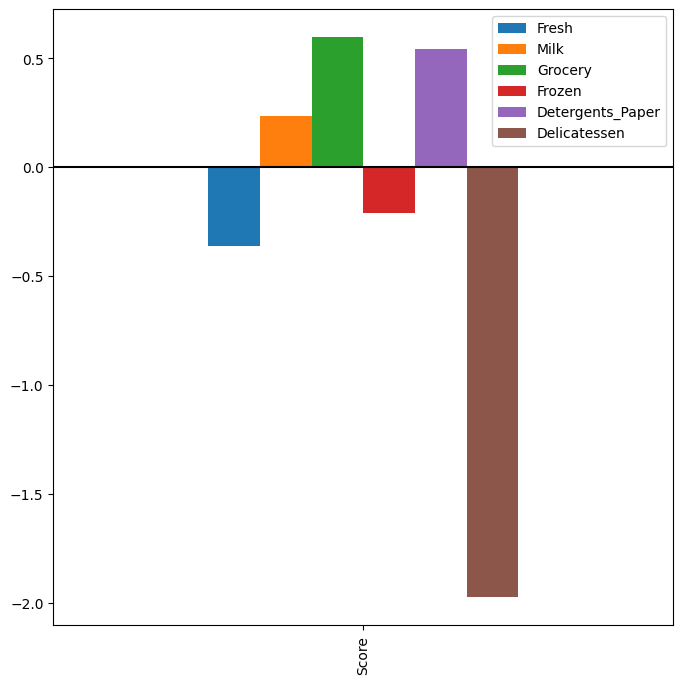

In [84]:
plt.figure(figsize = (12,12))
new_one.plot(kind = "bar",figsize=(8,8))
plt.axhline(0, color='k')


### Question 2

* Which feature did you attempt to predict?
* What was the reported prediction score?
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
- I tried the Grocery feature.
- With 75.1% prediction score.
- With the high prediction score the feature is easily predicted, so it's not a necessary feature for identifying customer's spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

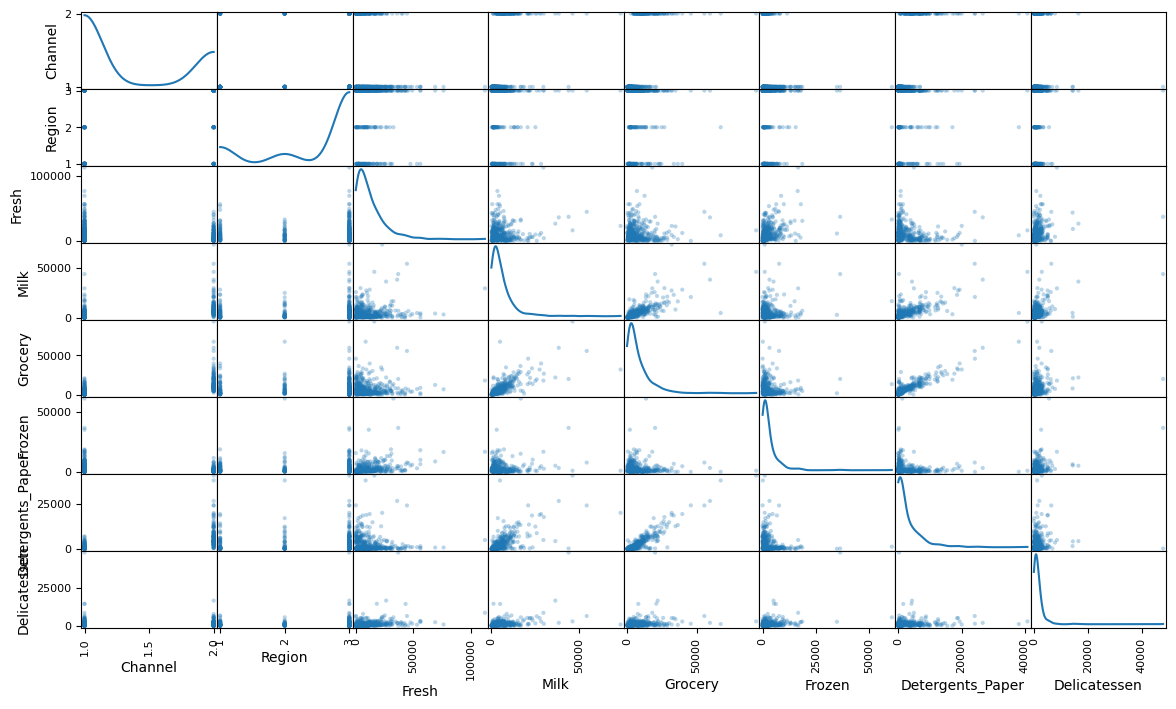

In [85]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation?
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer**:

1- Yes! Detergents_Paper and Grocery are highly correlated. There may be little correlation between Detergents_Paper and Milk, Grocery and Milk as well.

2- Yes! It confirms my suspicions about the relevance of the feature in Question 2.

3-The data distribution plot looks more like a F distribution.




## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

array([[<Axes: xlabel='Fresh', ylabel='Fresh'>,
        <Axes: xlabel='Milk', ylabel='Fresh'>,
        <Axes: xlabel='Grocery', ylabel='Fresh'>,
        <Axes: xlabel='Frozen', ylabel='Fresh'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Fresh'>,
        <Axes: xlabel='Delicatessen', ylabel='Fresh'>],
       [<Axes: xlabel='Fresh', ylabel='Milk'>,
        <Axes: xlabel='Milk', ylabel='Milk'>,
        <Axes: xlabel='Grocery', ylabel='Milk'>,
        <Axes: xlabel='Frozen', ylabel='Milk'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Milk'>,
        <Axes: xlabel='Delicatessen', ylabel='Milk'>],
       [<Axes: xlabel='Fresh', ylabel='Grocery'>,
        <Axes: xlabel='Milk', ylabel='Grocery'>,
        <Axes: xlabel='Grocery', ylabel='Grocery'>,
        <Axes: xlabel='Frozen', ylabel='Grocery'>,
        <Axes: xlabel='Detergents_Paper', ylabel='Grocery'>,
        <Axes: xlabel='Delicatessen', ylabel='Grocery'>],
       [<Axes: xlabel='Fresh', ylabel='Frozen'>,
        <Axes: xla

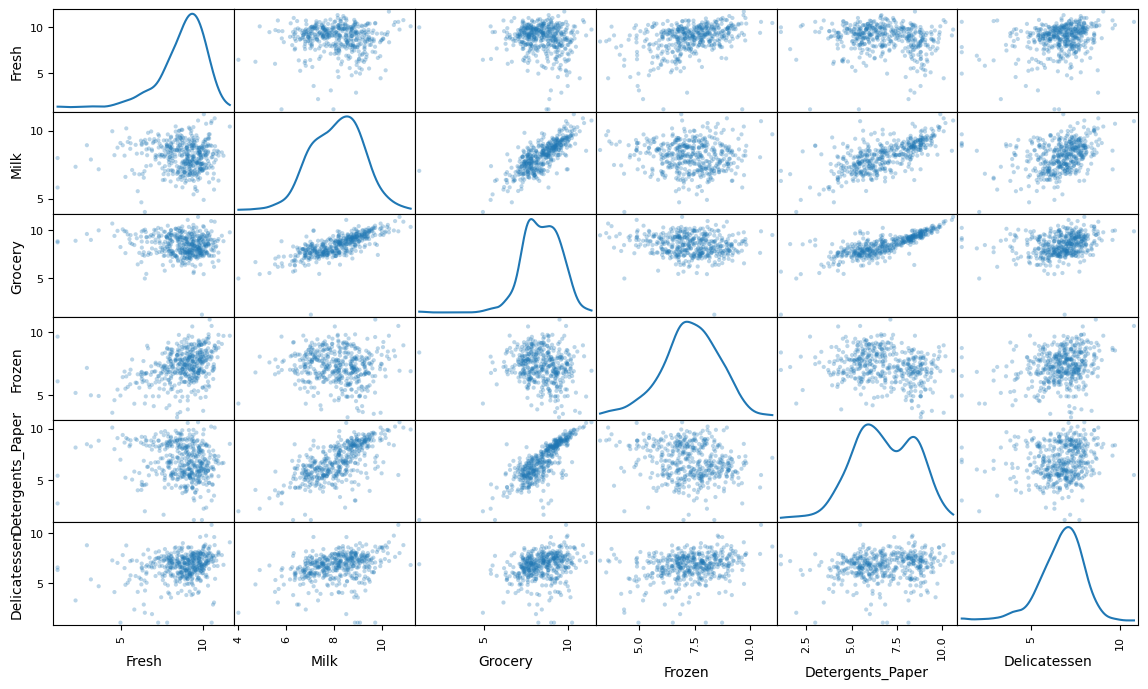

In [86]:
log_data = np.log(data)
samples= data.iloc[index]
log_sample = np.log(samples)

scatter_matrix(log_data.loc[:,'Fresh':],alpha = 0.3, figsize = (14,8), diagonal = 'kde')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [87]:
display(log_sample.iloc[:,2:])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
125,11.241602,8.152774,8.868132,9.713416,6.656727,6.822197
430,8.038189,8.349957,9.710085,6.354370,5.484797,7.640123


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [88]:
outlier_df=pd.DataFrame()
for feature in log_data.columns[2:]:

  q1=np.percentile(log_data[feature],25)
  q3=np.percentile(log_data[feature],75)

  threshold  = 1.5 * (q3 - q1)

  outlier_df=pd.concat([outlier_df,log_data[(log_data[feature] > (q3 + threshold)) | (log_data[feature] < (q1 - threshold))]])


#display(outlier_df)
bad_index={}
for index in outlier_df.index:
  if index not in bad_index:
    bad_index[index]=1

  else:
    bad_index[index] +=1

outliers=[i for i,n in bad_index.items() if n >1]
print(outliers)
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
outliars_data = log_data.iloc[log_data.index[outliers],:]


[65, 66, 128, 154, 75]


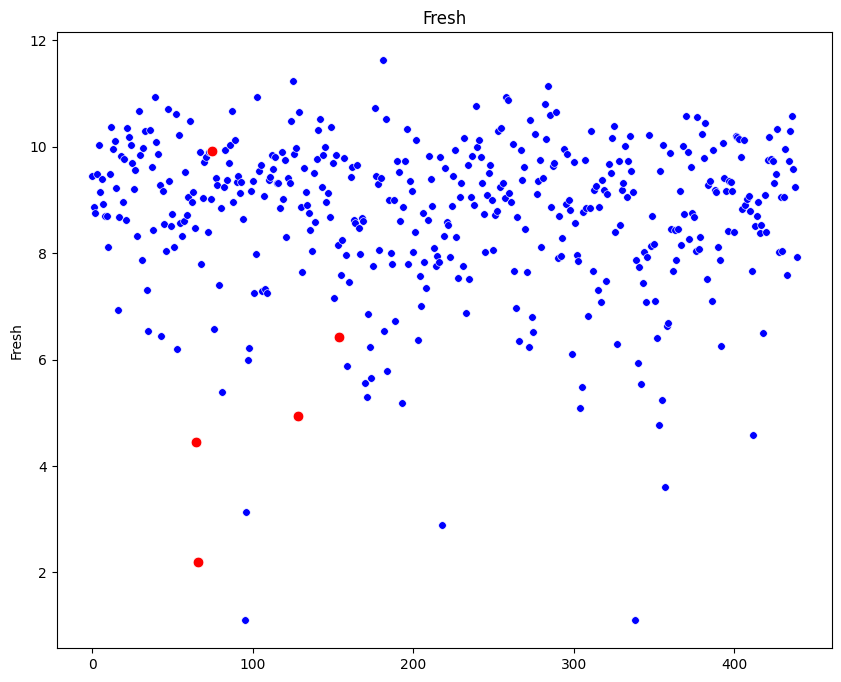

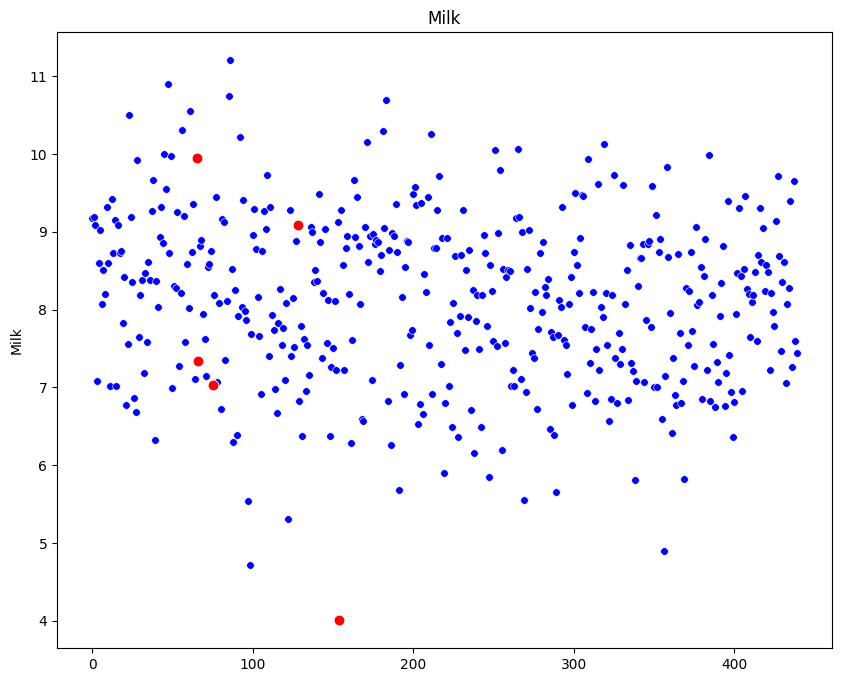

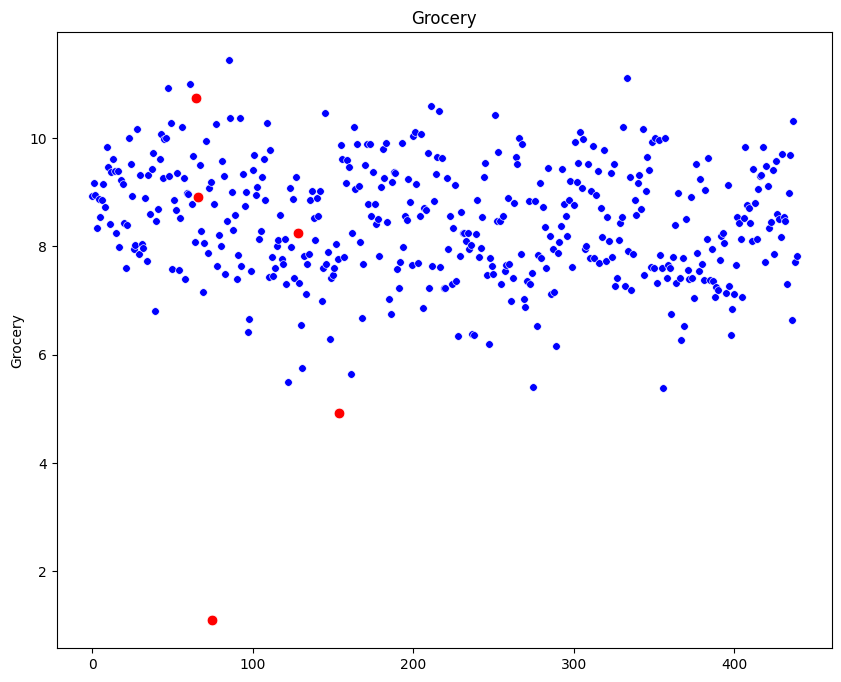

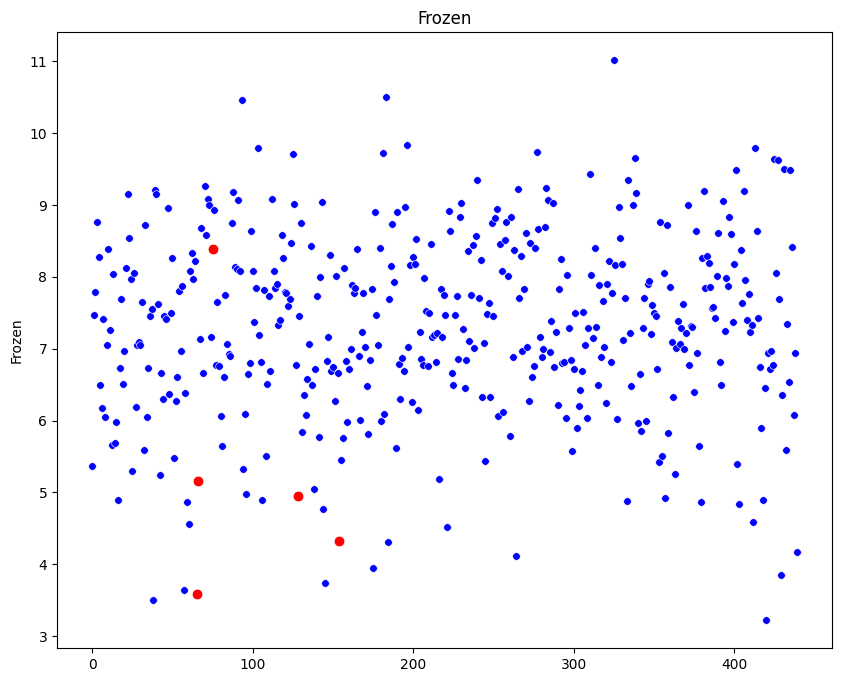

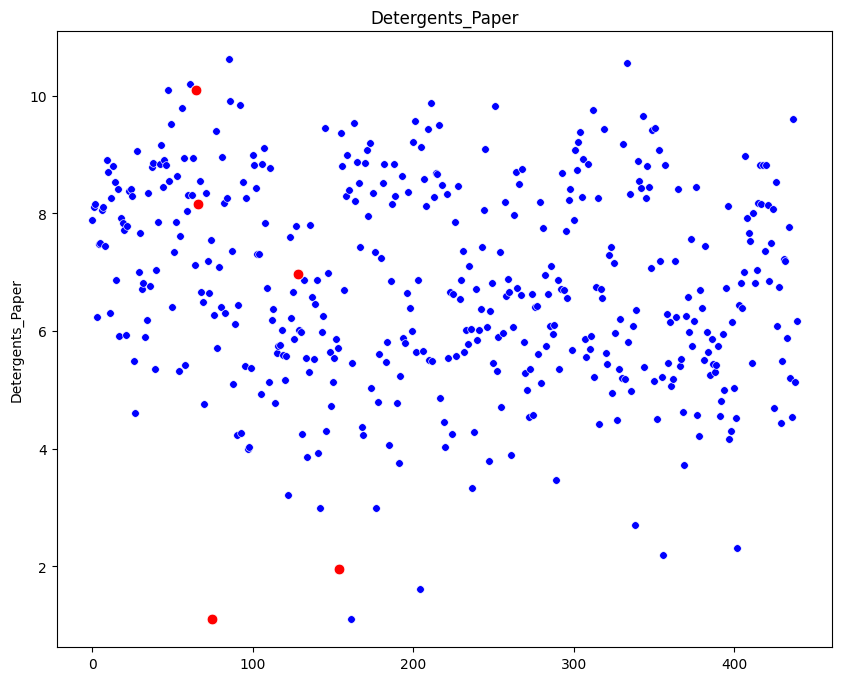

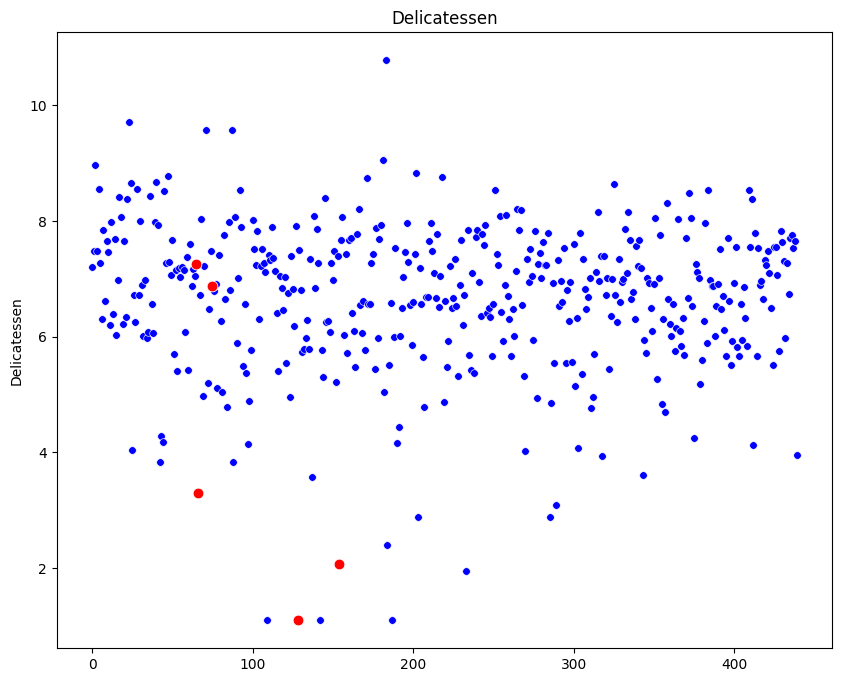

In [89]:
for feature in log_data.columns[2:]:
  plt.figure(figsize=(10,8))
  sns.scatterplot(log_data[feature],color='b',s=30)
  sns.scatterplot(outliars_data[feature],color='r',s=60)
  plt.title(f'{feature}')
  plt.show()

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above?
* Should these data points be removed from the dataset?
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer**

Yes, There are data points considered outliers for more than one feature based on the definition above.

Yes, they should be removed and the reason is that the data points at row [128, 154, 65, 66, 75] has more than one outlier features because they are more likely to be true outliers than others.

Removing all of them could cause underfitting. So, for ones with one feature outlier, I decided to keep them as single outlier feature. It may be the desirable pattern in the datasets.



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [90]:
from sklearn.decomposition import PCA
good_data = good_data.iloc[:,2:]
log_sample = log_sample.iloc[:,2:]
pca = PCA(n_components=6)
pca.fit(good_data)

pca_samples = pca.transform(log_sample)

display(pca_samples)

array([[-1.08504271, -0.32431538, -0.26347853, -0.88118903,  0.18620598,
        -0.53468154],
       [ 0.73942651, -2.98341219, -0.82041866,  1.29454193,  0.12967462,
         0.47121617],
       [-0.08563488,  0.4483062 ,  1.0449841 , -1.3292265 ,  1.17324366,
         1.12305263]])

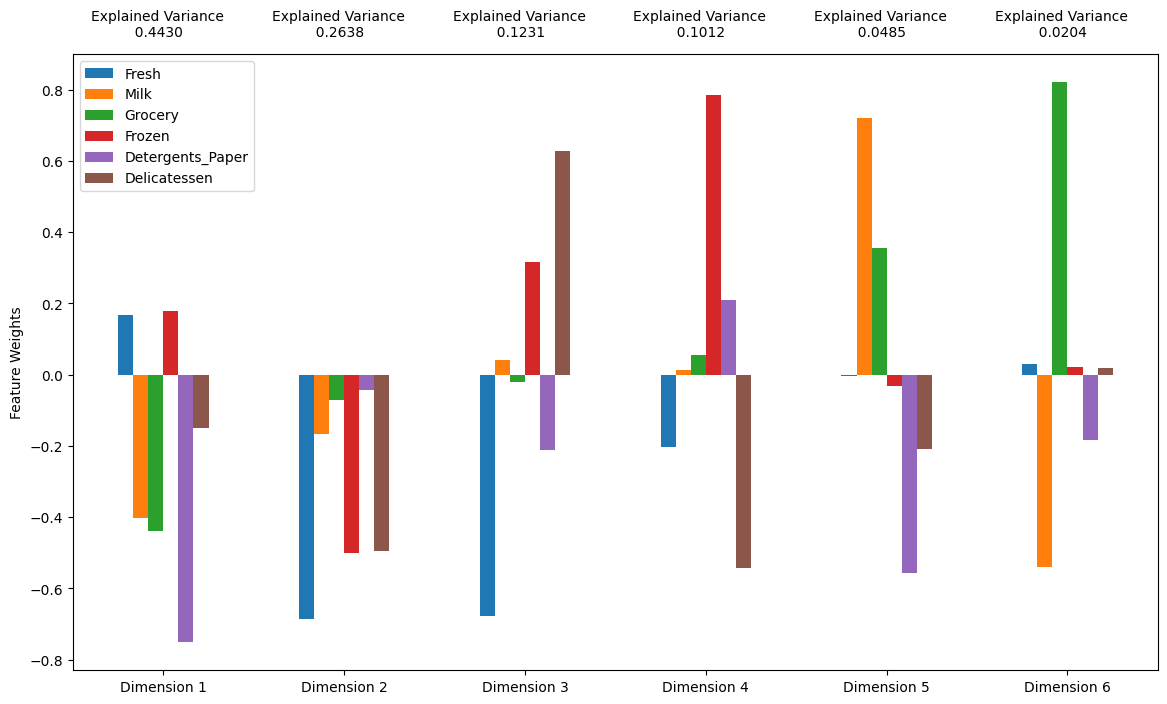

In [91]:
pca_results = vs.pca_results(good_data, pca)

In [92]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


In [93]:
pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component?
* How much variance in the data is explained by the first four principal components?
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer**

How much variance in the data is explained in total by the first and second principal component?

Total variance by the first and second principal component: 0.7068

What about the first four principal components?

Total variance by first four princile components: 0.9311

Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.

Dimension 1: It shows large increases for features Milk, Grocery and Detergents_Paper, a small increase for Delicatessen, and small decreases for features Fresh and Frozen.

Dimension 2: It shows large increases for Fresh, Frozen and Delicatessen, and small increase for Milk, Grocery and Detergents_Paper.

Dimension 3: It shows large increases for Frozen and Delicatessen, and large decreases for Fresh and Detergents_Paper.

Dimension 4: It shows large increases for Frozen and Detergents_Paper, and large a decrease for Fish and Delicatessen.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [94]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.0850,-0.3243,-0.2635,-0.8812,0.1862,-0.5347
1,0.7394,-2.9834,-0.8204,1.2945,0.1297,0.4712
2,-0.0856,0.4483,1.0450,-1.3292,1.1732,1.1231


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [95]:
pca = PCA(n_components=2)
pca.fit(good_data)

reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_sample)

In [96]:
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [97]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0850,-0.3243
1,0.7394,-2.9834
2,-0.0856,0.4483


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

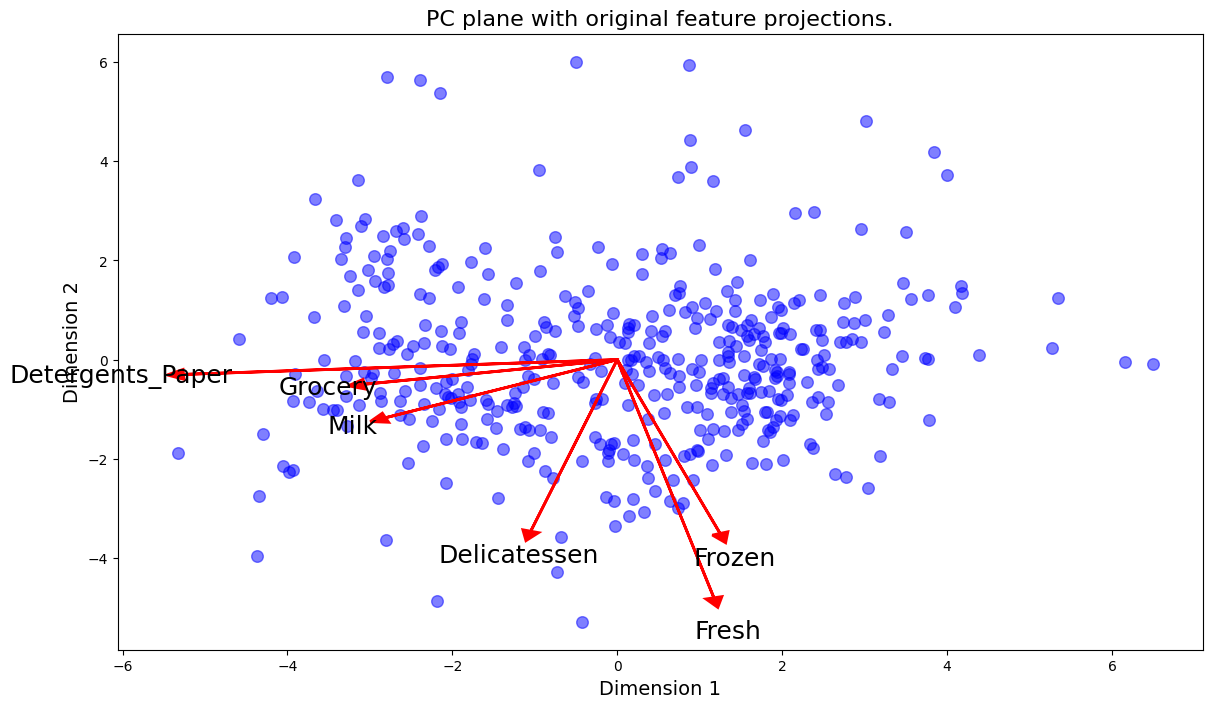

In [98]:
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories.

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.

### Question 6

* What are the advantages to using a K-Means clustering algorithm?
* What are the advantages to using a Gaussian Mixture Model clustering algorithm?
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer**

What are the advantages to using a K-Means clustering algorithm?

It is simple to understand and easy to implement.In computational point of view, it is fast to run and always converge. It is suitable for searching convex clusters.

What are the advantages to using a Gaussian Mixture Model clustering algorithm?

It is the fastest algorithm for learning mixture models among other available models. In case of overlapping clusters, it has "soft" classification technique available. In GMM, there are well-studied statistical inference techniques available.

Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

Gaussian Mixture Model clustering algorithm would be the most appropriate because from preious scatter graph of data sets with reduced features, there are two clusters that overlap with each other.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [99]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores={}
for i in range(2,6):
  cluster = GaussianMixture(n_components=i,random_state=40).fit(reduced_data)

  pred = cluster.predict(reduced_data)
  centers = cluster.means_

  sample_preds = cluster.predict(pca_samples)


  score = silhouette_score(reduced_data, pred, random_state=1)

  scores[i]=score



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


In [100]:
scores

{2: 0.4219168464626149,
 3: 0.37553218893793083,
 4: 0.24842117656657087,
 5: 0.28523681068367135}

In [101]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


cluster = GaussianMixture(n_components=2,random_state=40).fit(reduced_data)

pred = cluster.predict(reduced_data)
centers = cluster.means_

sample_preds = cluster.predict(pca_samples)





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


### Question 7

* Report the silhouette score for several cluster numbers you tried.
* Of these, which number of clusters has the best silhouette score?

**Answer**

It is shown in previous output of "Implementation: Creating Clusters". the Best Score: 0.42, for number of components=2.



### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters.

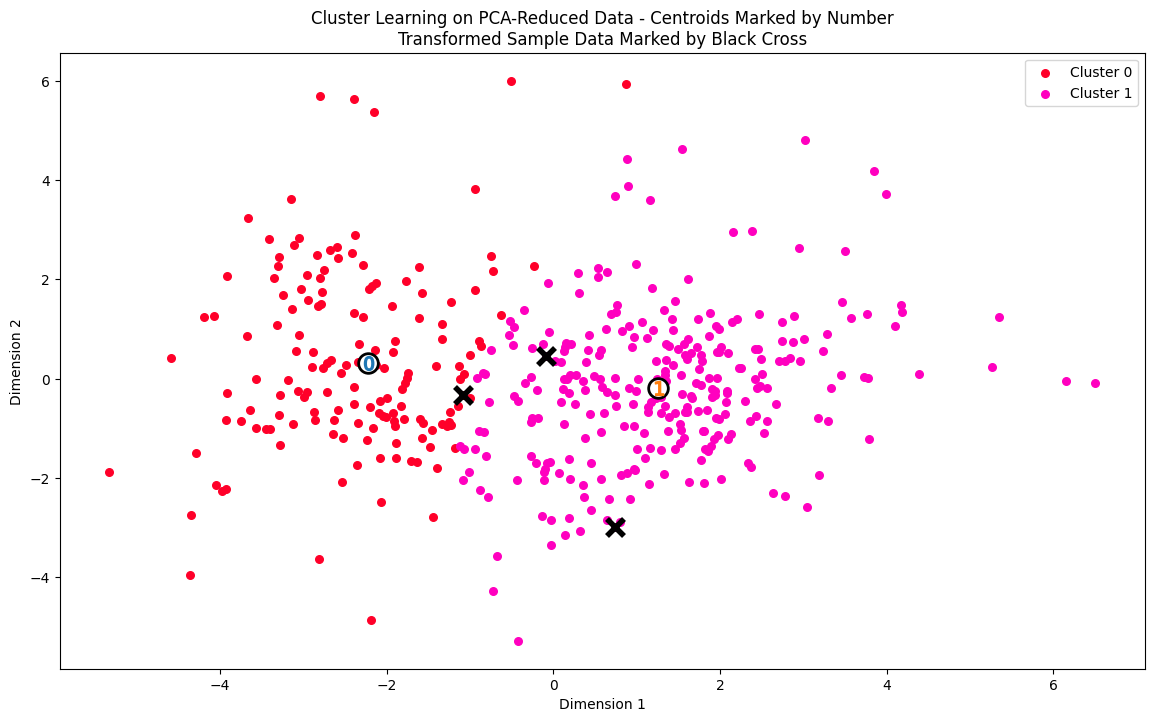

In [102]:
vs.cluster_results(reduced_data, pred, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [103]:
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = good_data.keys())
true_centers.index = segments

display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


<Axes: >

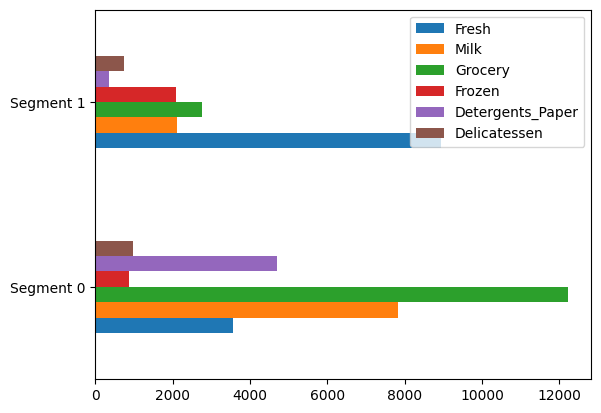

In [104]:
true_centers.plot.barh()

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer**

Segment 0 customers buy most Fresh, Frozen (> %50) and much Delicatessen (40%), it's mostly likely to be a convinence store or greegrocery.

Segment 1 customers buy lots of Grocery, Milk and Detergents_Paper (> 70%), following by Delicatessen (~%50), it indicates it's a supermarket.



### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it?
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [105]:
index=[5 , 125 ,430]
samples=data.iloc[index]
samples.iloc[:,2:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
5,9413,8259,5126,666,1795,1451
125,76237,3473,7102,16538,778,918
430,3097,4230,16483,575,241,2080


<Axes: >

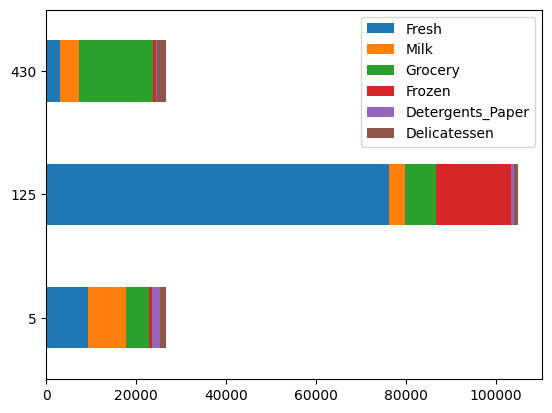

In [106]:
samp = samples.iloc[:,2:]
samp.plot.barh(stacked=True)

1-
Sample point 0 predicted to be in Cluster 0

Sample point 1 predicted to be in Cluster 1

Sample point 2 predicted to be in Cluster 1

2-Yes

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively.

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

Answer:

The items that customer purchase like: Fresh, Milk and Frozen are time sensitive and customer may prefer faster and frequent dilivery. Clustering designed with focusing on these three features may give distributor more intution.

One can perform the A/B test by selecting a random sample from each cluster and reducing the delivery frequency for each of them. Then a suvey of customer satisfaction could be made for further analysis. An equally sized group of customers with same shopping conditions except the delivery time selected from the remaining customers could be used for comparison. The A/B test data is prepared, interpreated and cross-validated by changing the delivery service to certain amount of test customers. The process can be iterated until certain model is verified or market goals are met.



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

Answer:

The customer segment (cluster prediction) can be used as target and one can design the supervised learning model based on them. The model developed could be used to predict the new customer data.

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?
* Would you consider these classifications as consistent with your previous definition of the customer segments?

Answer:

How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?
The algorithm and the number of clusters chosen matches with the underlying distribution.

Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?

No, there will be overlap areas for two clusters. Although there is some overlap between the two groups in the middle of the distribution, segment 0 in the analysis is clearly "Retail", and segment 1 is clearly "Hotel/Restaurants/Cafes".

Would you consider these classifications as consistent with your previous definition of the customer segments?

It shows the previous definition of customer segments is consistent with the classification using the Channel feature. I believe the algorithm did a reasonable job of clustering these customers according to broad categories of business type.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.